In [1]:
# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [3]:
# Function to load specific datasets
def load_datasets(dataset):
    # Determine the current working directory
    current_dir = os.getcwd()
    
    # Create the path to the raw_data directory relative to the current directory
    base_dir = os.path.abspath(os.path.join(current_dir, "..", "raw_data"))
    
    # List of all files in the base directory
    all_files = os.listdir(base_dir)
    
    # Create the path to the dataset files
    dataset_files = [f for f in all_files if f.startswith(f"Dataset_{dataset[-1]}_")]
    
    datasets = {}
    for filename in dataset_files:
        file_path = os.path.join(base_dir, filename)
        # Key name for the dictionary
        key_name = filename.replace(f"Dataset_{dataset[-1]}_", '').replace('.csv', '')
        datasets[key_name] = pd.read_csv(file_path)

    return datasets

## Exploring Data Set A: 2023 US Civil Flights 2023

#### Load Data Set A

In [4]:
# Set varianle for data set A - US 2023 Kaggle Civil Flights
dataset_a = "Dataset_A"

# Load data set A
dataset_a_files = load_datasets(dataset_a)

In [5]:
#Explore all files in data set A
print("Data files in Dataset_A:")
for key in dataset_a_files.keys():
    print(key)

Data files in Dataset_A:
US2023_Kaggle_US_Flights_January 2024
US2023_Kaggle_US_Flights_2023
US2023_Kaggle_Weather_Meteo_By_Airport
US2023_Kaggle_Cancelled_Diverted_2023
US2023_Kaggle_Airports_Geolocation


In [6]:
da_flights_2024 = dataset_a_files['US2023_Kaggle_US_Flights_January 2024']
da_flights_2023 = dataset_a_files['US2023_Kaggle_US_Flights_2023']
da_weather = dataset_a_files['US2023_Kaggle_Weather_Meteo_By_Airport']
da_cancelled_flights = dataset_a_files['US2023_Kaggle_Cancelled_Diverted_2023']
da_airports = dataset_a_files['US2023_Kaggle_Airports_Geolocation']

In [7]:
#Inspect 2023 Flights
da_flights_2023.head()

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,...,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10


In [8]:
#Inspect Weather data set
da_weather.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id
0,2023-01-01,8.1,2.2,11.7,0.0,0.0,278.0,9.7,1013.8,ABE
1,2023-01-02,5.4,0.0,11.7,0.0,0.0,353.0,3.6,1019.6,ABE
2,2023-01-03,8.4,7.2,9.4,15.2,0.0,50.0,5.0,1013.9,ABE
3,2023-01-04,11.1,6.7,17.2,0.0,0.0,302.0,4.7,1009.8,ABE
4,2023-01-05,12.7,6.7,14.4,7.9,0.0,292.0,7.2,1013.0,ABE


In [9]:
#Inspect Cancelled data set
da_cancelled_flights.head()

,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,...,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft
0,2023-01-25,3,Endeavor Air,N691CA,1.0,0.0,JFK,"New York, NY",Evening,0.0,...,"Ithaca/Cortland, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
1,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,MSP,"Minneapolis, MN",Morning,0.0,...,"Pittsburgh, PA",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
2,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,PIT,"Pittsburgh, PA",Afternoon,0.0,...,"Minneapolis, MN",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
3,2023-01-11,3,Endeavor Air,N926XJ,1.0,0.0,BWI,"Baltimore, MD",Afternoon,0.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
4,2023-01-25,3,Endeavor Air,N335PQ,0.0,1.0,BWI,"Baltimore, MD",Afternoon,2.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0


#### Perform Basic EDA on Data Set A

#### Exploring each file in data set A separately

* US2023_Kaggle_US_Flights_January 2024
* US2023_Kaggle_US_Flights_2023
* US2023_Kaggle_Weather_Meteo_By_Airport
* US2023_Kaggle_Cancelled_Diverted_2023
* US2023_Kaggle_Airports_Geolocation

In [10]:
print("\nUS Flights 2023 - Missing Values:")
print(da_flights_2023.isnull().sum())


US Flights 2023 - Missing Values:
FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
Manufacturer          0
Model                 0
Aicraft_age           0
dtype: int64


In [11]:
print("\nUS Flights 2023 - Duplicate Records:")
print(da_flights_2023.duplicated().sum())


US Flights 2023 - Duplicate Records:
31


In [12]:
print("\nUS Flights 2023 - Statistical Summary:")
print(da_flights_2023.describe())


US Flights 2023 - Statistical Summary:
        Day_Of_Week     Dep_Delay  Dep_Delay_Tag     Arr_Delay  \
count  6.743404e+06  6.743404e+06   6.743404e+06  6.743404e+06   
mean   3.982793e+00  1.220099e+01   3.790013e-01  6.627152e+00   
std    2.001762e+00  5.507936e+01   4.851385e-01  5.707892e+01   
min    1.000000e+00 -9.900000e+01   0.000000e+00 -1.190000e+02   
25%    2.000000e+00 -5.000000e+00   0.000000e+00 -1.500000e+01   
50%    4.000000e+00 -2.000000e+00   0.000000e+00 -6.000000e+00   
75%    6.000000e+00  9.000000e+00   1.000000e+00  9.000000e+00   
max    7.000000e+00  4.413000e+03   1.000000e+00  4.405000e+03   

       Flight_Duration  Delay_Carrier  Delay_Weather     Delay_NAS  \
count     6.743404e+06   6.743404e+06   6.743404e+06  6.743404e+06   
mean      1.402978e+02   5.169804e+00   7.428505e-01  2.566957e+00   
std       7.287216e+01   3.645732e+01   1.435393e+01  1.500484e+01   
min       0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%       8.700

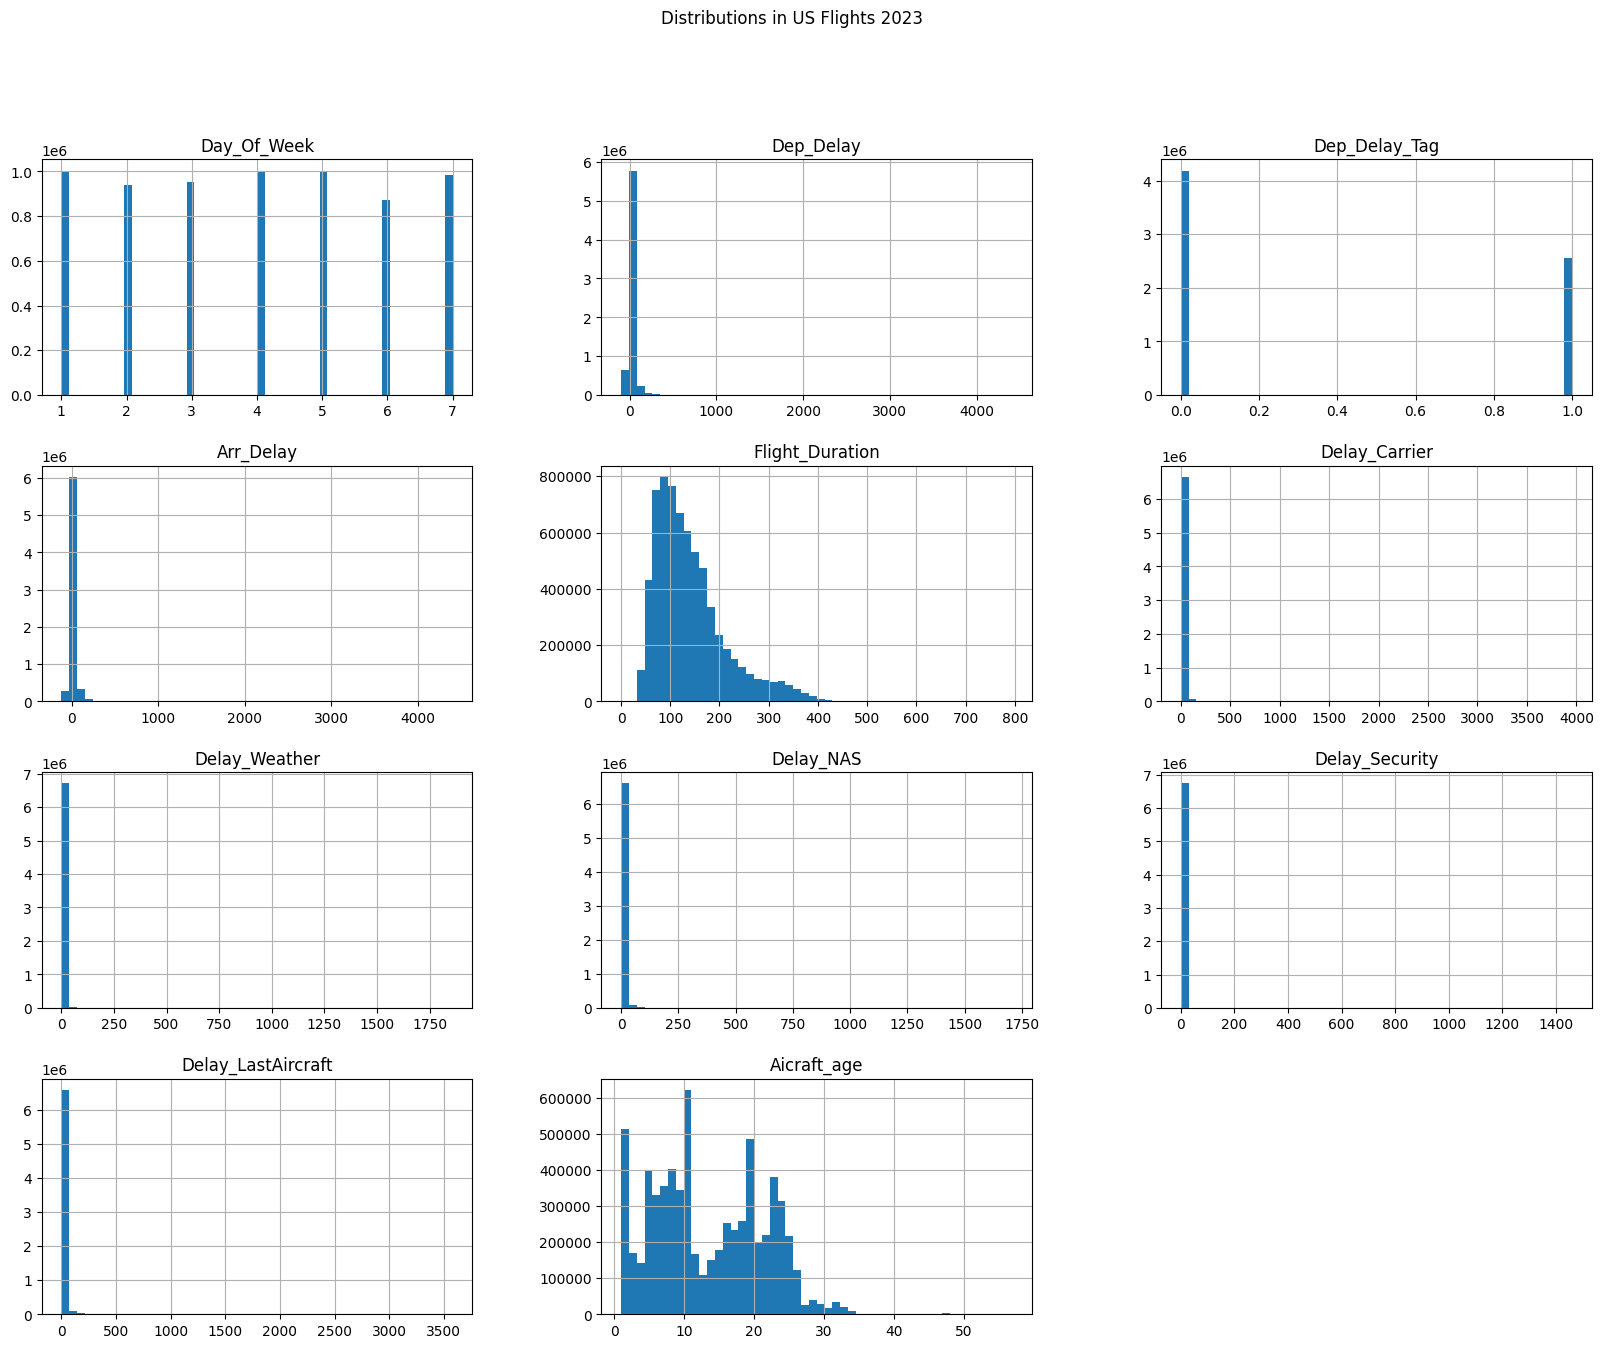

In [13]:
da_flights_2023.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distributions in US Flights 2023")
plt.show()